In [1]:
# import usual libraries for machine learing and data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Read CSV

In [3]:
df = pd.read_csv('./Dataset/heart_encode_scaled.csv')

In [5]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0.244898,0.444444,0.633540,0.0,0.5,0.770992,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.428571,0.629630,0.295031,0.0,0.5,0.648855,0.0,0.161290,0.5,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.183673,0.351852,0.614907,0.0,1.0,0.206107,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.408163,0.425926,0.400621,0.0,0.5,0.282443,1.0,0.241935,0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.530612,0.537037,0.341615,0.0,0.5,0.389313,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Split dataset

In [32]:
# split the data into training and testing data using train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN sklearn

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [34]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8435374149659864


# KNN from scratch

In [53]:
def minkowski_distance(x, y, p):
    # return the minkowski distance between two points
    return np.linalg.norm(x - y, ord=p)

minkowski_distance(X_train.iloc[0, :], X_train.iloc[1, :], p=2)

1.8613960436566013

In [88]:
from collections import Counter

# create class that represent k-nearest-neighbors
class KNN:
    def __init__(self, k=5, p = 2):
        self.k = k
        self.p = p
        self.distance_function = minkowski_distance
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            # find the nearest neighbors of the point x
            distances = np.array([self.distance_function(X.iloc[i, :], self.X_train.iloc[j, :], p=self.p) for j in range(len(self.X_train))])
            k_minimum_distances_indices = np.argsort(distances)[:self.k]
            k_minimum_distances_labels = self.y_train.iloc[k_minimum_distances_indices].to_numpy()
            counter = Counter(k_minimum_distances_labels)
            y_pred[i] = counter.most_common(1)[0][0]
        return y_pred

In [83]:
len(X_train)

587

In [89]:
knn_classifier = KNN(k=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

In [92]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8435374149659864


<AxesSubplot:>

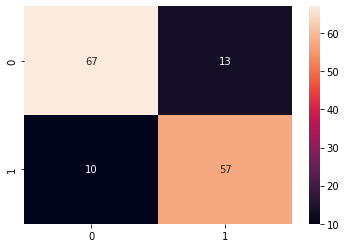

In [95]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)